**INTRO - Getting files**

In [ ]:
#BASIC
import pandas as pd
import numpy as np

import scipy as sp
import sklearn as sk
from scipy import stats
from scipy.stats import norm

import random
import time

import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

In [ ]:
#import data
PATH1 = "C:/Users/kpunyakoti/Desktop/Data Science/Kaggle/Telco Customer Churn/"   #where you read the files from
#PATH2 = "C:/Users/kpunyakoti/Desktop/Data Science/Projects/LO Metrics/Submissions/"   #where you export the files to

train = pd.read_csv(f'{PATH1}Telco.csv')
#test = pd.read_csv(f'{PATH1}test.csv')
train.head()

In [ ]:
# calculating percentile funtion
def getpercentile(x, i):
    for a in range(1,11):
            a = a/10
            b = i+a
            c =np.percentile(x, b)
            print(b,"  ",c)

#eg:    getpercentile(play_data.GrLivArea, 99)

In [9]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def smape(y, yhat):
    return 100 * np.mean(2 * np.abs(y - yhat)/(np.abs(y) + np.abs(yhat)))


In [8]:
import numpy as np
preds = [1, 3,4, 8,2, 1]
actuals = [3, 2, 1, 5, 4, 3]
preds = np.array(preds)
actuals = np.array(actuals)


np.sqrt(((preds-actuals) ** 2).mean())

2.273030282830976

In [10]:
rmse(preds, actuals)

2.273030282830976

In [11]:
import numpy as np

def grad_desc(x, y, learning_rate, steps):
    m_curr = b_curr = 0
    n = len(x)
    lr = float(learning_rate)
    period = 10
    steps_per_period = steps/period
    
    for period in range(0, period):
        for i in range(int(steps_per_period)):
            y_pred = m_curr*x + b_curr
            cost = (1/n) * sum([val**2 for val in (y-y_pred)])  #cost formula
            md = -(2/n)*sum(x*(y-y_pred))     #partial derivative for m
            bd = -(2/n)*sum(y-y_pred)       #partial derivative for b
            m_curr = m_curr - lr * md
            b_curr = b_curr - lr * bd
        print ("m: {}, b: {}, cost: {}, period: {}".format(m_curr, b_curr, cost, period))

In [12]:
a = np.array([1,2,3,4,5])
b = np.array([4,6,8,10,12])

In [13]:
grad_desc(a,b, 0.08, 900)

m: 2.031444234178423, b: 1.8861301555029009, cost: 0.002492191397601052, period: 0
m: 2.002673057287663, b: 1.9903494020379062, cost: 1.790764173723537e-05, period: 1
m: 2.0002265939716173, b: 1.9991819238640958, cost: 1.28681904990723e-07, period: 2
m: 2.0000192082541757, b: 1.9999306521076796, cost: 9.246908618759554e-10, period: 3
m: 2.0000016282738047, b: 1.9999941214149177, cost: 6.644704162747925e-12, period: 4
m: 2.0000001380279304, b: 1.999999501675373, cost: 4.7747950491675193e-14, period: 5
m: 2.0000000117005565, b: 1.999999957757278, cost: 3.4311034995790175e-16, period: 6
m: 2.0000000009918493, b: 1.9999999964191058, cost: 2.4655461030204144e-18, period: 7
m: 2.000000000084079, b: 1.99999999969645, cost: 1.7717049806907714e-20, period: 8
m: 2.000000000007127, b: 1.9999999999742686, cost: 1.273127996160326e-22, period: 9


In [ ]:
math = np.array([92,56,88,70,80,49,65,35,66,67])
cs = np.array([98,68,81,80,83,52,66,30,68,73])

In [ ]:
grad_desc(math,cs,0.00027, 1000)

In [1]:
#RMSE function
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

## Summary Statistics

In [2]:
#returns summary statistics in transposed dataframe for categorical columns
def cat_stats(df):
    cat_stats = pd.DataFrame(df.describe(include = [np.object]))
    cat_stats = cat_stats.T
    cat_stats['distribution'] = cat_stats['freq']/cat_stats['count']*100
    #cat_stats.sort_values('distribution', ascending=False)
    return cat_stats

## Value Counts

In [5]:
#returns top 10 categories value counts for categorical columns in a dataframe
def valuecounts(df, cat_cols=None, normalize=False):
    if cat_cols==None:
        desc_df = pd.DataFrame(df.describe(include = [np.object]))
        cat_cols = desc_df.columns.tolist()
        print("List of Categorical Columns:", cat_cols)
    else:
        cat_cols
    for c in cat_cols:
        print(c)
        if normalize:
            print(df[c].value_counts(normalize=True)[:10])
        else:
            print(df[c].value_counts()[:10])
        print('\n')

## Null Ratios

In [4]:
#Returns Missing data Ratios in dataframe
def na_data(df):
    play_data_na = (df.isnull().sum() / len(df)) * 100
    play_data_na = play_data_na.drop(play_data_na[play_data_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :play_data_na})
    missing_data.head(20)
    return missing_data

This formula **$f(x) = x^2$** is an example.

## Techniques

#### Strip String - Strip dollar sign

In [7]:
''' blazing fast technique for removing $ sign from a dollar value string
def remove_dollar(df, col):
    np.fromstring(df[col].values.astype('|S7').tobytes().replace(b'$',b''), dtype='|S6')
However the above technique not working
'''
##try the below method to strip $ from the string - this next best fast method
df[col] =  [x.strip('$') for x in df[col]]

## another method when you have multiple bad characters to be replaces
df1['Visit_Revenue'] = df1['Visit_Revenue'].replace('[\$,]', '', regex=True).astype(float)
df1['Revenue'] = df1['Revenue'].replace(',', '', regex=True).astype(float)

**specifying format in pd.to_datetime is faster than without specifying format.**<br>
on 1.4mil records dataset:<br>
    %timeit pd.to_datetime(df1.date])<br>
2min 30s ± 750 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)<br>
    %timeit pd.to_datetime(df1.date, format="%m/%d/%Y)<br>
3.78 s ± 121 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)<br>
**Thats a huge difference**

In [ ]:
##stack and unstack to convert all columns
df['COLUMN1'].str.decode("utf-8")
To do this for multiple columns you can select just the str columns:

str_df = df.select_dtypes([np.object])
convert all of them:

str_df = str_df.stack().str.decode('utf-8').unstack()
You can then swap out converted cols with the original df cols:
/
for col in str_df:
    df[col] = str_df[col]

## some jupyter tricks

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np

mpl.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 10,6

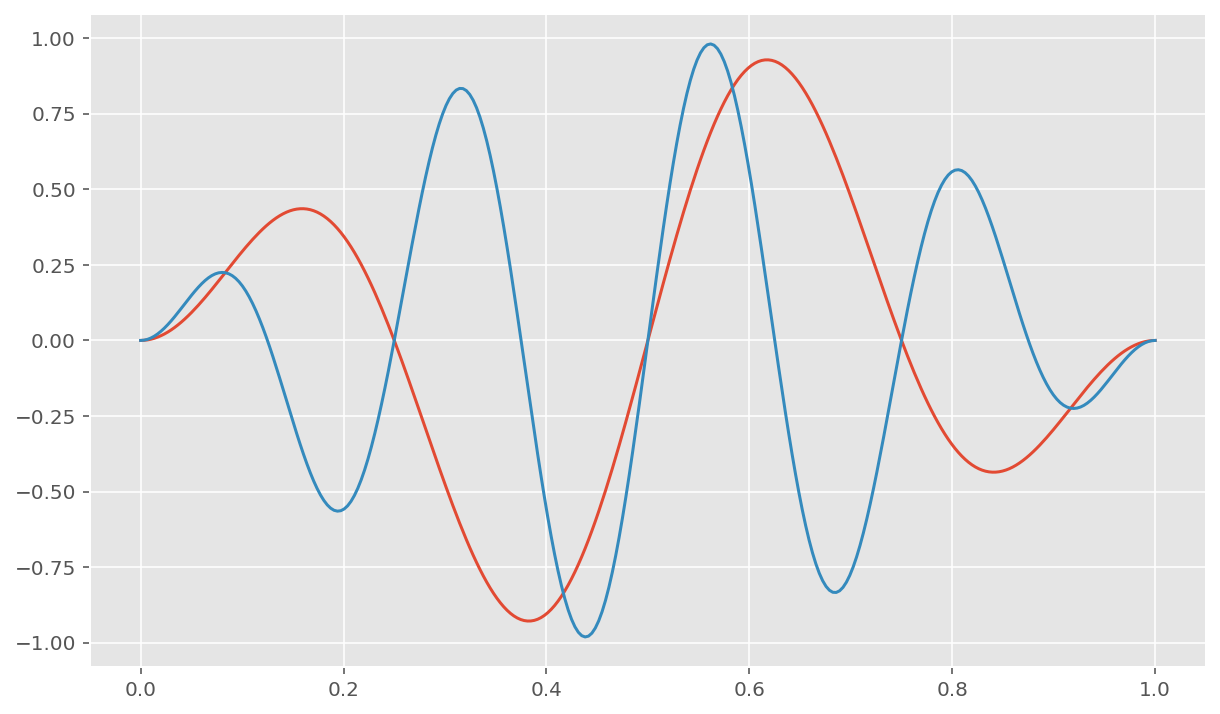

In [19]:
x = np.linspace(0,1,300)
for i in range(2,6,2):
    plt.plot(x, np.sin(np.pi*x)*np.sin(2*i*np.pi*x))

In [21]:
%pdb 
#for debugging within notebook

Automatic pdb calling has been turned ON


In [24]:
n = 'hello'
len(n)

5

### Softmax Function

In [1]:
import numpy as np

def softmax(L):
    expL = np.exp(L)
    sumL = np.sum(expL)
    S = [j/sumL for j in expL]
    return S

In [2]:
a = [1,2,0]

b = softmax(a)
b

[0.24472847105479764, 0.6652409557748219, 0.09003057317038046]

## Installing XGBoost

**step 1:** Download appropriate XGBoost wheel from https://www.lfd.uci.edu/~gohlke/pythonlibs/<br>
&emsp;&emsp;&emsp;&emsp;In my case, its **xgboost-0.90-cp37-cp37m-win32.whl** for python 3.7
<br>**step 2:** from command prompt, navigate to the directory where the downloaded file is present
<br>**step 3:** run the command "pip install xgboost-0.90-cp37-cp37m-win32.whl"

### Cros-entropy

#### Short format

In [53]:
def cr_short(Y, P):
    z = [P[i] if (Y[i] == 1) else (1-P[i]) for i in range(0, len(Y))] 
    return -np.sum(np.log(z))

In [54]:
def cr_formula(Y, P):
    Y, P = np.float_(Y), np.float_(P)
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

#### Long format

In [55]:
def cr_long(Y, P):
    z=[]
    for i in range(0, len(P)):
        if Y[i] == 1:
            z.append(P[i])
        else:
            P[i] = 1-P[i]
            z.append(P[i])
    lnz = np.log(z)
    return -np.sum(lnz)

In [66]:
y, p = [1,1,0,0], [.6, .2, .9, .3]

cr_sh, cr_fo, cr_lo = cr_short(y,p), cr_formula(y,p), cr_long(y,p)

print("",np.round(cr_sh, 1),'\n',cr_fo, '\n',cr_lo)

 4.8 
 4.779523573132869 
 4.779523573132869


#### Error Function
Error function is average of cross entropy

In [57]:
def err_short(Y, P):
    z = [P[i] if (Y[i] == 1) else (1-P[i]) for i in range(0, len(Y))] 
    return -np.sum(np.log(z))/len(Y)

In [58]:
def err_formula(Y, P):
    Y, P = np.float_(Y), np.float_(P)
    return (-np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P)))/len(Y)

In [68]:
y, p = [1,1,0,0], [.6, .2, .9, .3]
err_sh, err_fo = err_short(y,p), err_formula(y,p)

print("",np.round(err_sh,1),'\n',err_fo)

 1.2 
 1.1948808932832173
